# **Topic 2. 두 정보 비교하기_실습**

## **(1) 환경준비**

### 1) 라이브러리 불러오기

In [ ]:
# jupyter lite에서 패키지 설치
import piplite
await piplite.install("seaborn")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

### 2) 데이터 불러오기

* 데이터 설명
|칼럼명|설명|타입|
|----|----|----|
|total_bill|총금액|수치형|
|tip|팁|수치형|
|gender|성별|범주형|
|smoke|흡연여부|범주형|
|day|요일|범주형|
|time|식사구분|범주형|
|size|식사인원|수치형|



In [ ]:
data = pd.read_csv('tips2.csv')
data.head()

,total_bill,tip,gender,smoke,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **(2) 실습1 : 수치형 vs 수치형**

* ① total_bill과 tip에 대해 산점도를 그리고 관계를 살펴봅시다.
* ② data에는 수치형 변수에 대해 상관계수를 구하고 가장 강한 상관관계를 찾아 봅시다.

① total_bill과 tip에 대해 산점도를 그리고 관계를 살펴봅시다.

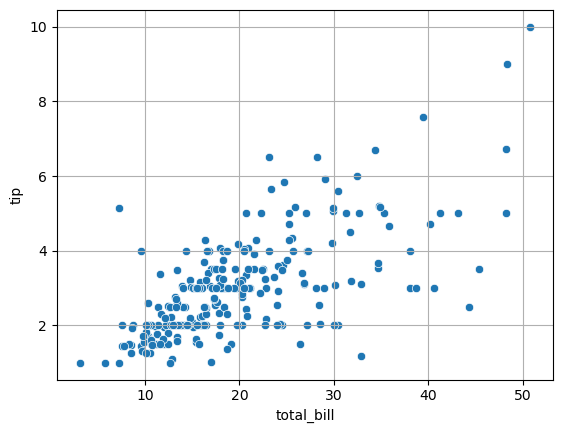

In [ ]:
sns.scatterplot(x = 'total_bill' , y= 'tip' , data = data)
plt.grid()
plt.show()

관계를 설명해 봅시다.

In [ ]:
# total_bill이 높아짐에 따라 tip도 높아진다.
# 강한 양의 상관관계로 보인다.


② data에는 수치형 변수에 대해 상관계수를 구하고 가장 강한 상관관계를 찾아 봅시다.

In [ ]:
data.corr()

#[안내] warning 메시지는 향후 버전에서 기본값이 'False'가 된다는 내용으로 무시하셔도 좋습니다.
#경고 메시지를 없애려면 numeric_only 매개변수를 True나 False로 지정하면 됩니다.

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## **(3) 실습2 : 범주형 vs 범주형**

gender와 time에 대해
* ① 교차표를 만들어 봅시다.
* ② 모자익플롯을 그려 봅시다.

① 교차표를 만들어 봅시다.


In [ ]:
# 전체 count
pd.crosstab(data['gender'], data['time'])

time,Dinner,Lunch
gender,,
Female,52,35
Male,124,33


In [ ]:
# 칼럼기준 비율
pd.crosstab(data['gender'], data['time' ], normalize  = 'columns')

time,Dinner,Lunch
gender,,
Female,0.295455,0.514706
Male,0.704545,0.485294


② 모자익플롯을 그려 봅시다.

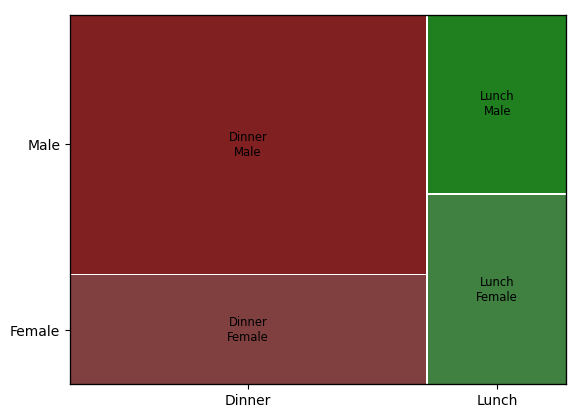

In [ ]:
mosaic(data, ['time','gender'])
plt.show()

* 비즈니스를 파악해 봅시다.

In [ ]:
# time과 성별은 관련이 있다.
# 점심때는 남여 비율이 대등, 저녁은 남자 비율이 월등히 높다.

## **(4) 실습3 : 수치형 vs 범주형**

* day(요일)과 tip에 대해 평균 비교 막대 그래프로 비교해 봅시다.

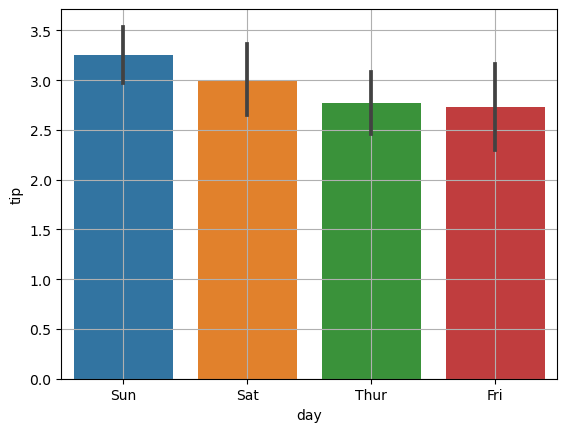

In [ ]:
sns.barplot(x= 'day' , y = 'tip'  , data = data)
plt.grid()
plt.show()

* 비즈니스를 파악해 봅시다.

In [ ]:
# 평일(목금) 보다 주말(토일)이 팁이 좀 더 높다
# 요일과 팁은 관계가 있지만, 강하다고 보긴 어렵다.
# 그런데, 팁은 총 금액과 연동되므로, 주말에 비싼 음식을 좀더 주문하는것은 아닐까?